In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 
import pprint


In [4]:

!pip install  --no-dependencies  git+https://github.com/j-bac/elpigraph-python.git
    

  Cloning https://github.com/j-bac/elpigraph-python.git to /tmp/pip-req-build-0e4ukc41
  Created wheel for elpigraph-python: filename=elpigraph_python-0.1.0-py3-none-any.whl size=86889 sha256=58f31bd6591a583109b0cf0ab211a10138df57ccea99b33950c17cb79b2a79c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-u2fskwao/wheels/79/fc/a4/52027e414f1ebe30d37db5ece4b4cd1680fa35b6e256bbf356
Successfully built elpigraph-python


In [5]:
import elpigraph

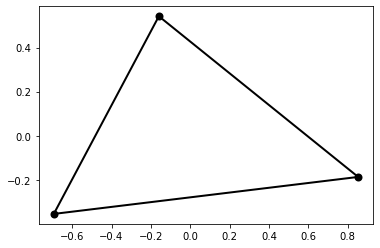

In [6]:
from sklearn.decomposition import PCA
try :
    import umap
except:
    print('cannot import umap')

def plot_graph(edges, nodes_positions, data = None, dim_reduction = 'PCA', graph_color = 'black', graph_linewidth=2, 
               plot_data = True, data_linewidth = 1,  data_color = 'tab:red', data_transparency_alpha = 0.9,
               umap_n_neighbors = 50, umap_min_dist = 0.99):
  '''
  #' Plots graphs defined by edges and nodes_positions, optionally - scatter plot the "data" on the same plot,
  #' Optionally performs PCA/etc (depending on dim_reduction)
  #'
  #' @param edges Nx2-shape matrix with edges ends, i.e. edges[k,0], edges[k,1] - ends of k-th edge  
  #' @param nodes_positions  matrix of nodes positions 
  #' @param data  "original dataset", basically arbitrary dataset for scatter plot, it should have same shape[1] as nodes_positions
  #' @param plot_data  True/False - to scatterplot or not data
  #' @param dim_reduction  'PCA', 'plot_first2axis', 'umap'
  #' @param data_color can be a vector or predefined color - argument for c = data_color in scatter

  #' @examples
  # edges = np.array([ [0,1],[1,2],[2,0] ] )
  # nodes_positions = np.random.rand(3,10) # 3 points in 10d space
  # plot_graph(edges, nodes_positions)
  #
  # t = elpigraph_output
  # edges = t[0]['Edges'][0]
  # nodes_positions = t[0]['NodePositions']
  # plot_graph(edges, nodes_positions)
  '''
  str_dim_reduction = dim_reduction
  if dim_reduction in ['PCA', 'umap' ]: #  not 'plot_first2axis':
    if dim_reduction.upper() == 'PCA':
      reducer = PCA()
    elif dim_reduction.lower() == 'umap':
      n_neighbors = umap_n_neighbors#  50
      min_dist= umap_min_dist # 0.99
      #n_components=n_components
      reducer = umap.UMAP( n_neighbors=n_neighbors,        min_dist=min_dist, n_components = 2)

    if data is not None:
      data2 = reducer.fit_transform(data)
      if plot_data == True:
        if data_color is None:
          plt.scatter(data2[:,0],data2[:,1], linewidth = data_linewidth , alpha = data_transparency_alpha)# ,cmap=plt.cm.Paired) # ,c=np.array(irx) 
          plt.xlabel(str_dim_reduction+'1')
          plt.ylabel(str_dim_reduction+'2')
        else:
          plt.scatter(data2[:,0],data2[:,1] ,cmap=plt.cm.Paired,c= data_color, linewidth = data_linewidth, alpha = data_transparency_alpha ) 
          plt.xlabel(str_dim_reduction+'1')
          plt.ylabel(str_dim_reduction+'2')
    else:
      reducer.fit(nodes_positions)

    nodes_positions2 = reducer.transform( nodes_positions )
  else:
    if plot_data == True:
      if data is not None:
        if data_color is None:
          plt.scatter(data[:,0],data[:,1] , linewidth = linewidth, alpha = data_transparency_alpha )# ,cmap=plt.cm.Paired) # ,c=np.array(irx) 
        else:
          plt.scatter(data[:,0],data[:,1] ,cmap=plt.cm.Paired,c= data_color , linewidth = data_linewidth, alpha = data_transparency_alpha ) 
    nodes_positions2 = nodes_positions

  plt.scatter(nodes_positions2[:,0],nodes_positions2[:,1],c = graph_color, linewidth = graph_linewidth)#, cmap=plt.cm.Paired)

  edgeCount = edges.shape[0]
  for k in range(edgeCount):
    n0 = edges[k,0]
    n1 = edges[k,1]
    x_line = [ nodes_positions2[n0,0],  nodes_positions2[n1,0] ]
    y_line = [ nodes_positions2[n0,1],  nodes_positions2[n1,1] ]
    plt.plot(x_line, y_line, graph_color, linewidth = graph_linewidth) # 'black')

    
edges = np.array([ [0,1],[1,2],[2,0] ] )
nodes_positions = np.random.rand(3,10) # 3 points in 10d space
plot_graph(edges, nodes_positions)    

Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
2 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  10  nodes on  1000  points and  2  dimensions
Nodes =  2 3 4 5 6 7 8 9 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||10	0.0266	10	9	4	2	0	0	0.0198	0.0164	0.8846	0.9043	0.005	0.0018	0.0177	0.1768	0


13.8558  seconds elapsed
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
3 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being us

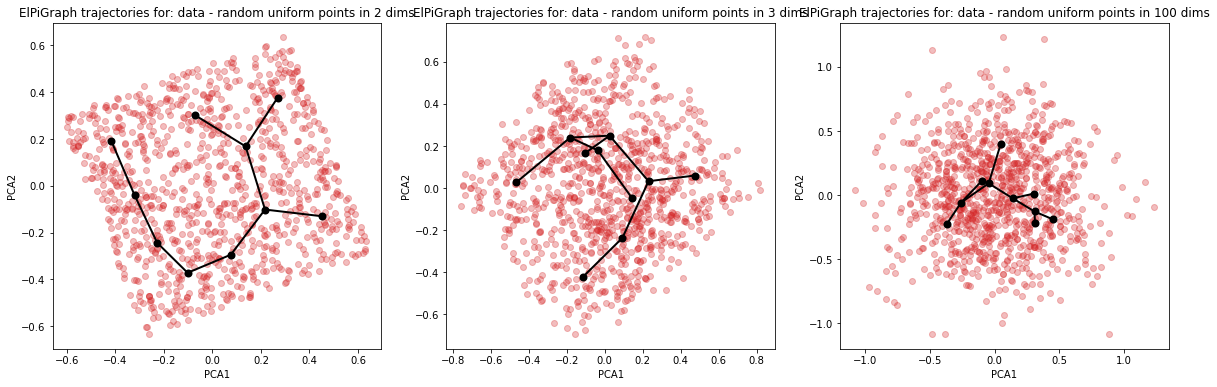

In [7]:
fig = plt.figure(figsize=(20, 6))
n_subplots_x = 3
c = 0

for dim in [2,3,100]:
    c+=1; fig.add_subplot(1, n_subplots_x , c) 
    X = np.random.rand(1000,dim )
    #dict_result =  create_tree_by_cluster_knn_mst(X)# - Calcuates a tree for given dataset, by kmeans+knn+mst
    tree_elpi = elpigraph.computeElasticPrincipalTree(X , NumNodes=10, 
      alpha=0.01,FinalEnergy='Penalized', StoreGraphEvolution = True )#,

    nodes_positions = tree_elpi[0]['NodePositions'] # ['AllNodePositions'][k]
    matrix_edges_weights = tree_elpi[0]['ElasticMatrix'] # ['AllElasticMatrices'][k]
    matrix_edges_weights = np.triu(matrix_edges_weights,1 )
    edges = np.array( np.nonzero(matrix_edges_weights), dtype = int ).transpose()

    plot_graph(edges, nodes_positions, data = X, dim_reduction = 'PCA', data_transparency_alpha = 0.3 )
    plt.title('ElPiGraph trajectories for: data - random uniform points in '+str(dim)+' dims')

plt.show()  

(600, 2) (600,)


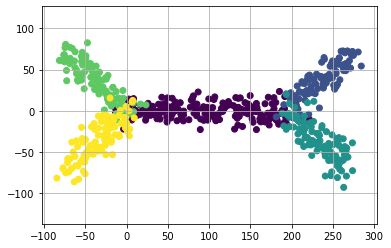

In [8]:
def make_dumbbell(n_layers = 1, n_features = 2,  sigma_noise = 10.0, n_samples4base = 200,
                  n_samples4branches = [100,100,100,100] , angles = [np.pi/4,-np.pi/4,3*np.pi/4,-3*np.pi/4] ):
  '''
  '''

  """
  n_layers = 2
  n_features = 2
  sigma_noise = 10.0
  plot_mode = 'PCA'
  n_samples4base = 200
  n_samples4branches = [100,100,100,100]
  angles = [np.pi/4,-np.pi/4,3*np.pi/4,-3*np.pi/4]
  """

  X_noiseless = np.zeros( (0,n_features))
  y_final = np.zeros( 0 )
  for layer in range(n_layers):
    current_label = 0 
    X = np.zeros( (n_samples4base, n_features) )
    X[:,0] = np.arange(n_samples4base)
    y = current_label * np.ones( n_samples4base )
    v_last_base_point_save = X[-1,:].copy()
    v_first_base_point_save = X[0,:].copy()

    # Make branches
    n_branches = len ( n_samples4branches )
    for c_branch in range( n_branches ) : # n_branches
      n_sample4branch = n_samples4branches[c_branch]
      current_label += 1
      y_branch = current_label * np.ones( n_sample4branch )
      angle = angles[c_branch] 
      if c_branch < n_branches/ 2:
        v_initial = v_last_base_point_save
      else:
        v_initial = v_first_base_point_save  
      X_branch = np.zeros( (n_sample4branch,  n_features)  ) #  [:2] = (np.cos(angle), np.sin(angle) )  
      v_direction = np.zeros( n_features)
      v_direction[0] = np.cos(angle)
      v_direction[1] = np.sin(angle)
      X_branch += v_direction # Broadcast vector to the whole array over axis 0 
      X_branch *= np.arange( 1, X_branch.shape[0] +1 ).reshape(X_branch.shape[0], 1 ) # Broadcast - mutiply each column by  by column = 1,2,3, ... 
      X_branch += v_initial # 
      X = np.concatenate( (X,X_branch) , axis = 0 )
      y = np.concatenate( (y, y_branch ))
    X_noiseless = np.concatenate( (X_noiseless,X) , axis = 0 )
    y_final = np.concatenate( (y_final,y) ) 
    
  X_noisy = X_noiseless + sigma_noise * np.random.randn( X_noiseless.shape[0], X_noiseless.shape[1] )


  y = y_final
  X = X_noisy

  if 0:
    print(X.shape, y.shape)
    r = X_noisy
    plt.scatter(r[:,0],r[:,1], c =y)
    plt.show()
  
  return X,y

X,y = make_dumbbell(n_layers = 1, n_features = 2,  sigma_noise = 10.0, n_samples4base = 200,
                  n_samples4branches = [100,100,100,100] , angles = [np.pi/4,-np.pi/4,3*np.pi/4,-3*np.pi/4] )
if 1:
  print(X.shape, y.shape)
  r = X
  plt.scatter(r[:,0],r[:,1], c =y)
  plt.axis("equal")
  plt.grid()
  plt.show()


Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
2 dimensions are being used
100.0 % of the original variance has been retained
The elastic matrix is being used. Edge configuration will be ignored
Computing EPG with  20  nodes on  600  points and  2  dimensions
Nodes =  2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

BARCODE	ENERGY	NNODES	NEDGES	NRIBS	NSTARS	NRAYS	NRAYS2	MSE	MSEP	FVE	FVEP	UE	UR	URN	URN2	URSD

2||20	324.6587	20	19	14	2	0	0	182.1413	128.9754	0.9879	0.9914	140.1287	2.3887	47.7738	955.4763	0


0.6348  seconds elapsed
Generating the initial configuration
Creating a chain in the 1st PC with 2 nodes
90% of the points have been used as initial conditions. Resetting.
Constructing tree 1 of 1 / Subset 1 of 1
Performing PCA
Using standard PCA
2 dimensions are being used
100.0 % of the original variance has be

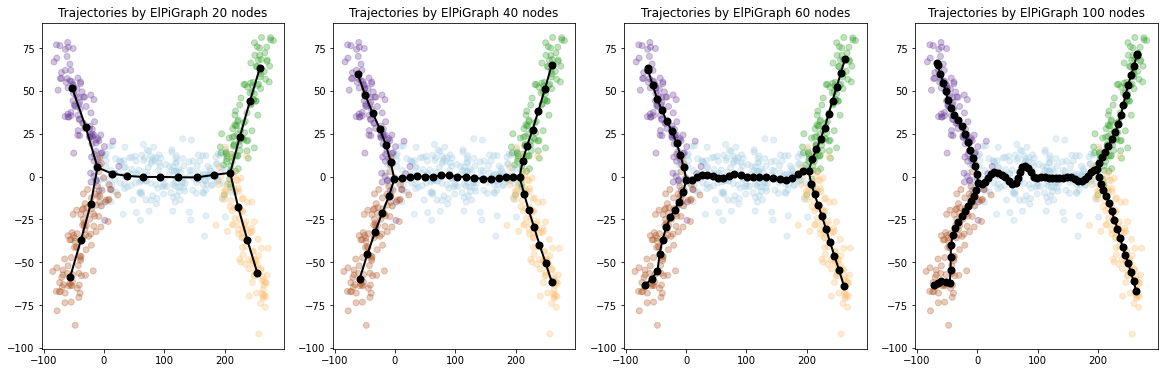

<Figure size 1440x432 with 0 Axes>

In [9]:
X,y = make_dumbbell(n_layers = 1, n_features = 2,  sigma_noise = 10.0, n_samples4base = 200,
                  n_samples4branches = [100,100,100,100] , angles = [np.pi/4,-np.pi/4,3*np.pi/4,-3*np.pi/4] )

fig = plt.figure(figsize=(20, 6))
c = 0
list_nodes_number = [20,40,60,100 ]
n_subplots_x = len(list_nodes_number)

for nodes_number in list_nodes_number:
    c+=1; fig.add_subplot(1, 4 , c ) 

    #dict_result =  create_tree_by_cluster_knn_mst(X)# , n_clusters= nodes_number )# - Calcuates a tree for given dataset, by kmeans+knn+mst
    #edges =  dict_result['edges_mst']
    #nodes_positions = dict_result['nodes_positions']

    NumNodes = nodes_number
    tree_elpi = elpigraph.computeElasticPrincipalTree(X , NumNodes=NumNodes, 
      alpha=0.01,FinalEnergy='Penalized', StoreGraphEvolution = True )#,

    nodes_positions = tree_elpi[0]['NodePositions'] # ['AllNodePositions'][k]
    matrix_edges_weights = tree_elpi[0]['ElasticMatrix'] # ['AllElasticMatrices'][k]
    matrix_edges_weights = np.triu(matrix_edges_weights,1 )
    edges = np.array( np.nonzero(matrix_edges_weights), dtype = int ).transpose()

    plot_graph(edges, nodes_positions, data = X, dim_reduction = 'plot_first2axis', data_transparency_alpha = 0.3 , data_color = y)
    plt.title('Trajectories by ElPiGraph ' + str(NumNodes)+' nodes');

    if (c%4 == 0) :
        plt.show() 
        fig = plt.figure(figsize=(20, 6))
        c = 0
         
        
plt.show()  
